In [1]:
import numpy as np
from scipy.optimize import minimize

# Definimos las constantes que tenemos por consigna: 
beta = 0.5
gamma = 1 - beta  # gamma = 0.5
K = 1
r = 0.04
b = 0.1
C = 1
L = 100
A = 1.5  



In [2]:
#Necesitamos a y alpha, para poder hacer el gráfico. A y alpha están en función de E, que es el nivel de empleo y que tampoco conocemos. 
def a(E):
    return (b * E) / (L - E)

def alpha(E):
    return (K ** (1 / gamma)) * ((b * E) ** ((gamma - 1) / gamma)) * ((L - E) ** (gamma / beta))

# Para llegar al estado estacionario, debemos buscar el E que haga que la ecuación (32) este lo más cerca de cero posible.

#rV_v(E) = -C + α(E)/(a(E) + α(E) + 2b + 2r) * A = 0 (32)

def equation(E):
    if E <= 0 or E >= L:
        return np.inf  # Ajustamos de esta forma para evitar divisiones por cero
    a_E = a(E)
    alpha_E = alpha(E)
    rV_v = -C + (alpha_E / (a_E + alpha_E + 2 * b + 2 * r)) * A
    return np.abs(rV_v) 

# Tenemos que elegir un valor inicial de E que no necesita ser el de equilibrio. Después se ajustará al verdadero E de equilibrio. Elegimos 10
result = minimize(equation, x0=10, bounds=[(0.01, 99.99)])

# Valor de E de equilibrio:
E_min = result.x[0]

In [3]:
print(f"El valor de E que hace que la ecuación esté más cerca de cero y por tanto el E de equilibrio de esta economía es: {E_min}")

# Calcular a y alpha para el E que minimiza la ecuación
a_ss = a(E_min)
alpha_ss = alpha(E_min)

#Pedimos que nos imprima los valores de a, alpha y E de equilibrio:

print(f"El valor de E que hace que la ecuación esté más cerca de cero es: {E_min}")
print(f"El valor de a cuando E es {E_min} es: {a_ss}")
print(f"El valor de alpha cuando E es {E_min} es: {alpha_ss}")

El valor de E que hace que la ecuación esté más cerca de cero y por tanto el E de equilibrio de esta economía es: 85.31210710624316
El valor de E que hace que la ecuación esté más cerca de cero es: 85.31210710624316
El valor de a cuando E es 85.31210710624316 es: 0.5808328514058371
El valor de alpha cuando E es 85.31210710624316 es: 1.7216657039621959


Ahora que ya tenemos todos los valores necesarios, podemos realizar el gráfico de Salario de equilibrio del modelo DMP con las ecuaciones (25) y (26)

In [5]:
# Redefinimos todas las variables con los valores obtenidos previamente
beta = 0.5
gamma = 1 - beta
K = 1
r = 0.04
b = 0.1
C = 1
L = 100
A = 1.5
E = E_min
a = a_ss
alpha = alpha_ss

# Imprimimos las variables redefinidas
print(f"Variables redefinidas con los valores obtenidos:")
print(f"beta = {beta}")
print(f"gamma = {gamma}")
print(f"K = {K}")
print(f"r = {r}")
print(f"b = {b}")
print(f"C = {C}")
print(f"L = {L}")
print(f"A = {A}")
print(f"E = {E}")
print(f"a = {a}")
print(f"alpha = {alpha}")

Variables redefinidas con los valores obtenidos:
beta = 0.5
gamma = 0.5
K = 1
r = 0.04
b = 0.1
C = 1
L = 100
A = 1.5
E = 85.31210710624316
a = 0.5808328514058371
alpha = 1.7216657039621959


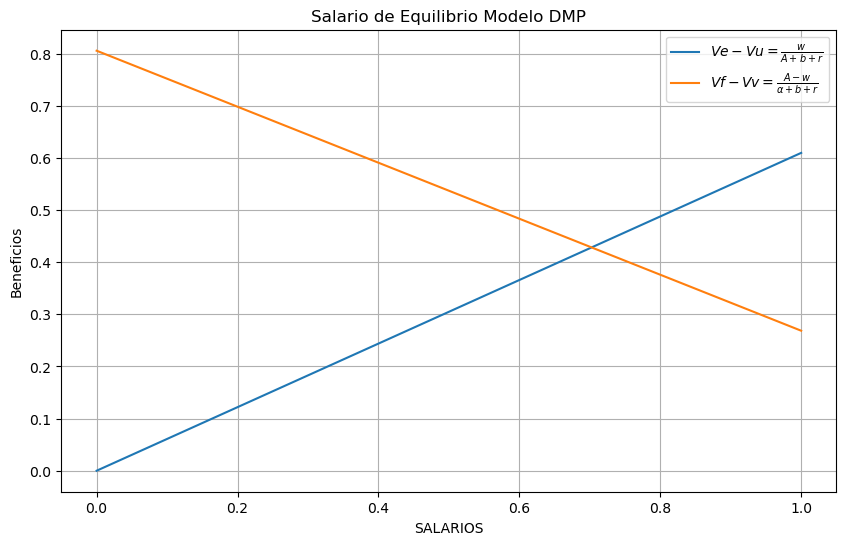

In [89]:
# Creamos un rango de valores sobre los que definimos al salario (w)=
w_valores = np.linspace(0, 1, 100)

# Calculamos las funciones de valor:
valor_empleo = w_valores / (A + b + r)
valor_full = (A - w_valores) / (alpha + b + r)

# Graficamos las funciones de valor (o ecuaciones (25) y (26)):
plt.figure(figsize=(10, 6))
plt.plot(w_valores, valor_empleo, label=r'$Ve - Vu = \frac{w}{A + b + r}$')
plt.plot(w_valores, valor_full, label=r'$Vf - Vv = \frac{A - w}{\alpha + b + r}$')
plt.xlabel('SALARIOS')
plt.ylabel('Beneficios')
plt.title('Salario de Equilibrio Modelo DMP')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Santiago\AppData\Local\Temp\ipykernel_18124\1788811630.py:3: RuntimeWarning: divide by zero encountered in divide
  return (100 - E) / (0.1 * E)
C:\Users\Santiago\AppData\Local\Temp\ipykernel_18124\1788811630.py:6: RuntimeWarning: divide by zero encountered in divide
  return 0.1 * E /(100 - E)
C:\Users\Santiago\AppData\Local\Temp\ipykernel_18124\1788811630.py:21: RuntimeWarning: invalid value encountered in divide
  return -C + (alpha(E_valores) / (a(E_valores) + alpha(E_valores) + 2*b + 2*r)) * A_low


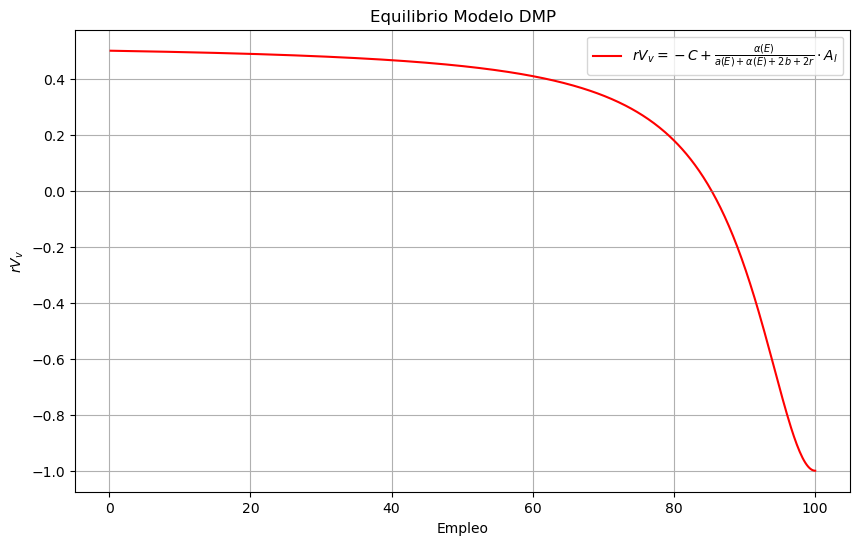

In [95]:
#Recordamos los parámetros y funciones:
def alpha(E):
    return (100 - E) / (0.1 * E) 

def a(E):
    return 0.1 * E /(100 - E)  

b = 0.1
r = 0.04
C = 1
E = 85.31210710624316
a_l = 1.5

# Definimos al empleo en el rango de cero a 100 con 500 valores equidistantes:

E_valores = np.linspace(0, 100, 500)

# Función rV_V(E)

def rV_v(E_valores, a_l):
    return -C + (alpha(E_valores) / (a(E_valores) + alpha(E_valores) + 2*b + 2*r)) * A_low

# Cálculo de rV_v(E) para A.
rV_v = rV_v(E_valores, a)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(E_valores, rV_v, label=r'$rV_v = -C + \frac{\alpha(E)}{a(E) + \alpha(E) + 2b + 2r} \cdot A_l$', color='red')
plt.axhline(0, color='gray', linewidth=0.5)
plt.title('Equilibrio Modelo DMP')
plt.xlabel('Empleo')
plt.ylabel('$rV_v$')
plt.legend()
plt.grid(True)
plt.show()


b. Si queremos analizar un shock a la productividad laboral, podemos hacerlo viendo los gráficos que acabamos de armar pero agregando otra curva con el $A_h$ de la siguiente forma:


In [96]:
# Recordamos el valor de las variables con los valores obtenidos previamente y agregamos el A_h:

beta = 0.5
gamma = 1 - beta
K = 1
r = 0.04
b = 0.1
C = 1
L = 100
a_l = 1.5
E = E_min
a = a_ss
alpha = alpha_ss
a_h = 2

# Imprimimos las variables redefinidas
print(f"Variables redefinidas con los valores obtenidos:")
print(f"beta = {beta}")
print(f"gamma = {gamma}")
print(f"K = {K}")
print(f"r = {r}")
print(f"b = {b}")
print(f"C = {C}")
print(f"L = {L}")
print(f"a_l = {a_l}")
print(f"E = {E}")
print(f"a = {a}")
print(f"alpha = {alpha}")
print(f"a_h = {a_h}")



Variables redefinidas con los valores obtenidos:
beta = 0.5
gamma = 0.5
K = 1
r = 0.04
b = 0.1
C = 1
L = 100
a_l = 1.5
E = 85.31210710624316
a = 0.5808328514058371
alpha = 1.7216657039621959
a_h = 2


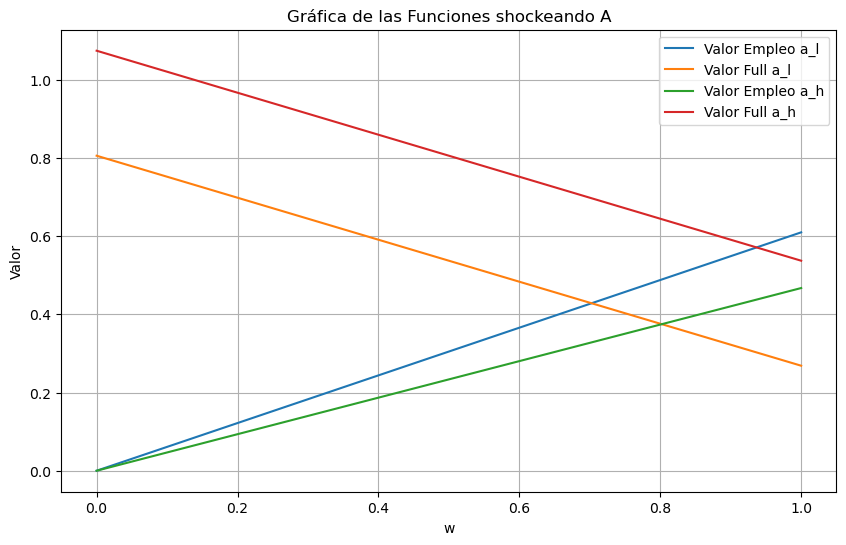

In [112]:
#Ahora para el grafico de empleo de equilibrio:

# Recordamos el valor de las variables con los valores obtenidos previamente y agregamos el A_h:

beta = 0.5
gamma = 1 - beta
K = 1
r = 0.04
b = 0.1
C = 1
L = 100
a_l = 1.5
E = E_min
a = a_ss
alpha = alpha_ss
a_h = 2

# Creamos un rango de valores sobre los que definimos al salario (w)=
w_valores = np.linspace(0, 1, 100)

# Calculamos las funciones de valor:
valor_empleo_al = w_valores / (a_l + b + r)
valor_full_al = (a_l - w_valores) / (alpha + b + r)
valor_empleo_ah = w_valores / (a_h + b + r)
valor_full_ah = (a_h - w_valores) / (alpha + b + r)

# Crear la gráfica
plt.figure(figsize=(10, 6))

plt.plot(w_valores, valor_empleo_al, label='Valor Empleo a_l')
plt.plot(w_valores, valor_full_al, label='Valor Full a_l')
plt.plot(w_valores, valor_empleo_ah, label='Valor Empleo a_h')
plt.plot(w_valores, valor_full_ah, label='Valor Full a_h')

plt.xlabel('w')
plt.ylabel('Valor')
plt.title('Salario de equilibrio shockeando A')
plt.legend()
plt.grid(True)

plt.show()



C:\Users\Santiago\AppData\Local\Temp\ipykernel_18124\2423476533.py:6: RuntimeWarning: divide by zero encountered in scalar power
  return (K ** (1 / gamma)) * ((b * E) ** ((gamma - 1) / gamma)) * ((L - E) ** (gamma / beta))
C:\Users\Santiago\AppData\Local\Temp\ipykernel_18124\2423476533.py:17: RuntimeWarning: invalid value encountered in scalar divide
  V_v = -C + (alpha_E / (a_E + alpha_E + 2 * b + 2 * r)) * 1.5
C:\Users\Santiago\AppData\Local\Temp\ipykernel_18124\2423476533.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  return (b * E) / (L - E)
C:\Users\Santiago\AppData\Local\Temp\ipykernel_18124\2423476533.py:26: RuntimeWarning: invalid value encountered in scalar divide
  V_v = -C + (alpha_E / (a_E + alpha_E + 2 * b + 2 * r)) * 2


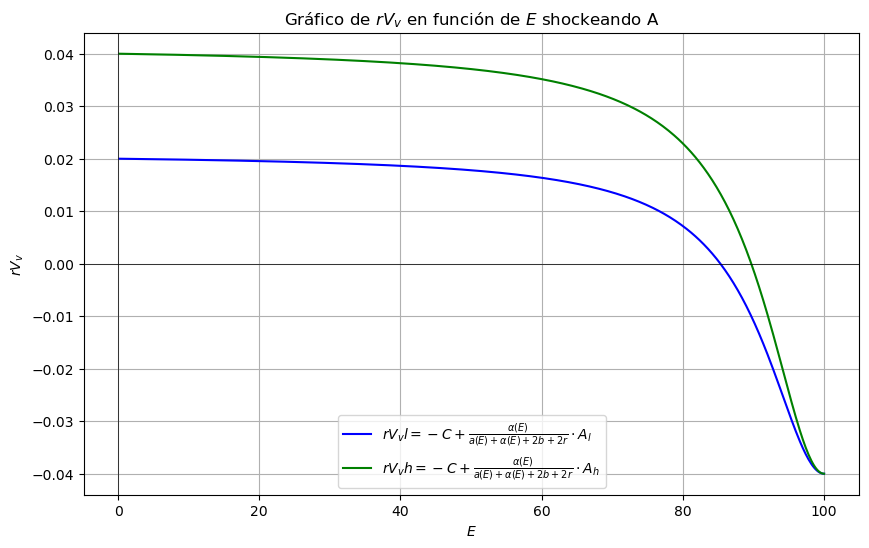

In [132]:
# Definición de funciones para a(E) y α(E)
def a(E):
    return (b * E) / (L - E)

def alpha(E):
    return (K ** (1 / gamma)) * ((b * E) ** ((gamma - 1) / gamma)) * ((L - E) ** (gamma / beta))

# Definimos E para valores de entre 0 y 100:
E_valores = np.linspace(0, 100, 500)

# Calculamos rV_v para cada valor de E con A = 1.5 (A_l)
rV_v_l = np.zeros_like(E_valores)

for i, E in enumerate(E_valores):
    a_E = a(E)
    alpha_E = alpha(E)
    V_v = -C + (alpha_E / (a_E + alpha_E + 2 * b + 2 * r)) * 1.5
    rV_v_l[i] = r * V_v

# Calculamos rV_v para cada valor de E con A = 2 (A_h)
rV_v_h = np.zeros_like(E_valores)

for i, E in enumerate(E_valores):
    a_E = a(E)
    alpha_E = alpha(E)
    V_v = -C + (alpha_E / (a_E + alpha_E + 2 * b + 2 * r)) * 2
    rV_v_h[i] = r * V_v

# Graficamos las dos rV_v en función de E
plt.figure(figsize=(10, 6))

plt.plot(E_valores, rV_v_l, label=r'$rV_vl = -C + \frac{\alpha(E)}{a(E) + \alpha(E) + 2b + 2r} \cdot A_l$', color='blue')
plt.plot(E_valores, rV_v_h, label=r'$rV_vh = -C + \frac{\alpha(E)}{a(E) + \alpha(E) + 2b + 2r} \cdot A_h$', color='green')

plt.title('Nivel de empleo $E$ de equilibrio shockeando A')
plt.xlabel('$E$')
plt.ylabel('$rV_v$')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()

plt.show()


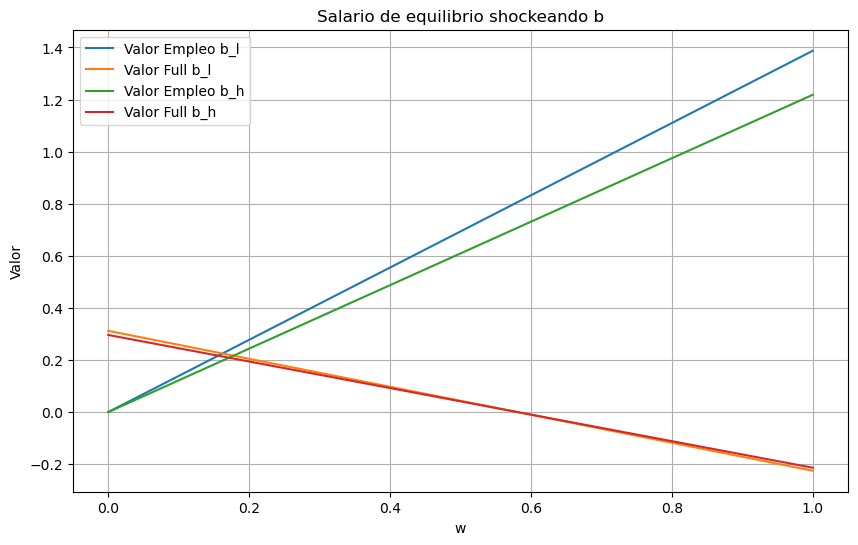

In [133]:
#Ahora para el grafico de empleo de equilibrio:

# Recordamos el valor de las variables con los valores obtenidos previamente y agregamos el b_h:

beta = 0.5
gamma = 1 - beta
K = 1
r_l = 0.04
b_l = 0.1
b_h = 0.2
C = 1
L = 100
a = 1.5
E = E_min
a = a_ss
alpha = alpha_ss

# Creamos un rango de valores sobre los que definimos al salario (w)=
w_valores = np.linspace(0, 1, 100)

# Calculamos las funciones de valor:
valor_empleo_bl = w_valores / (a + b_l + r)
valor_full_bl = (a - w_valores) / (alpha + b_l + r)
valor_empleo_bh = w_valores / (a + b_h + r)
valor_full_bh = (a - w_valores) / (alpha + b_h + r)

# Crear la gráfica
plt.figure(figsize=(10, 6))

plt.plot(w_valores, valor_empleo_bl, label='Valor Empleo b_l')
plt.plot(w_valores, valor_full_bl, label='Valor Full b_l')
plt.plot(w_valores, valor_empleo_bh, label='Valor Empleo b_h')
plt.plot(w_valores, valor_full_bh, label='Valor Full b_h')

plt.xlabel('w')
plt.ylabel('Valor')
plt.title('Salario de equilibrio shockeando b')
plt.legend()
plt.grid(True)

plt.show()


C:\Users\Santiago\AppData\Local\Temp\ipykernel_18124\1068819433.py:19: RuntimeWarning: divide by zero encountered in scalar power
  return (K ** (1 / gamma)) * ((b_value * E) ** ((gamma - 1) / gamma)) * ((L - E) ** (gamma / beta))
C:\Users\Santiago\AppData\Local\Temp\ipykernel_18124\1068819433.py:31: RuntimeWarning: invalid value encountered in scalar divide
  V_v = -C + (alpha_E / (a_E + alpha_E + 2 * b + 2 * r)) * 1.5
C:\Users\Santiago\AppData\Local\Temp\ipykernel_18124\1068819433.py:36: RuntimeWarning: invalid value encountered in scalar divide
  V_v_bh = -C + (alpha_E_bh / (a_E_bh + alpha_E_bh + 2 * b_h + 2 * r)) * 1.5
C:\Users\Santiago\AppData\Local\Temp\ipykernel_18124\1068819433.py:16: RuntimeWarning: divide by zero encountered in scalar divide
  return (b_value * E) / (L - E)


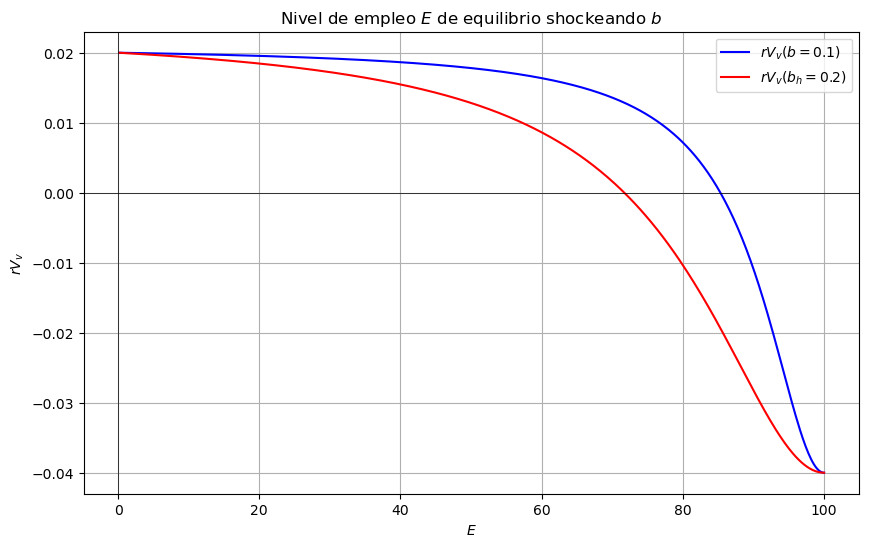

In [134]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
beta = 0.5
gamma = 1 - beta
K = 1
r = 0.04
b = 0.1
b_h = 0.2
C = 1
L = 100

# Definición de funciones para a(E) y α(E)
def a(E, b_value):
    return (b_value * E) / (L - E)

def alpha(E, b_value):
    return (K ** (1 / gamma)) * ((b_value * E) ** ((gamma - 1) / gamma)) * ((L - E) ** (gamma / beta))

# Definimos E para valores de entre 0 y 100
E_valores = np.linspace(0, 100, 500)

# Calculamos rV_v para cada valor de E con A = 1.5 (A_l)
rV_v_l = np.zeros_like(E_valores)
rV_v_l_bh = np.zeros_like(E_valores)

for i, E in enumerate(E_valores):
    a_E = a(E, b)
    alpha_E = alpha(E, b)
    V_v = -C + (alpha_E / (a_E + alpha_E + 2 * b + 2 * r)) * 1.5
    rV_v_l[i] = r * V_v
    
    a_E_bh = a(E, b_h)
    alpha_E_bh = alpha(E, b_h)
    V_v_bh = -C + (alpha_E_bh / (a_E_bh + alpha_E_bh + 2 * b_h + 2 * r)) * 1.5
    rV_v_l_bh[i] = r * V_v_bh

# Graficamos las curvas rV_v en función de E
plt.figure(figsize=(10, 6))

plt.plot(E_valores, rV_v_l, label=r'$rV_v (b = 0.1)$', color='blue')
plt.plot(E_valores, rV_v_l_bh, label=r'$rV_v (b_h = 0.2)$', color='red')

plt.title('Nivel de empleo $E$ de equilibrio shockeando $b$')
plt.xlabel('$E$')
plt.ylabel('$rV_v$')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()

plt.show()


3) Viendo los gráficos tras los shcoks, podemos ver que:

Un aumento de a tiene como resultado un aumento del salario de equilibrio. El hecho de que los trabajadores sean más productivos y los costos sean los mismos hacen que las firmas quieran contratar más trabajadores. Haciendo que los salarios suban. Si los salarios suben, los trabajadores valoran más el empleo. Cuando analizamos lo que ocurre con el empleo de equilibrio vemos que aumenta. Esto se debe a que tener un puesto ocupado es ahora más valioso y por ende brinda un mayor salario a quien lo ocupa.  

Un aumento en b tiene como resultado una disminución del valor de estar empleado. Si la renta de estar desempleado aumenta, el salario ofrecido por una firma a un trabajador para que este lo acepte debe ser mayor. Esto hace que tengamos un aumento en el salario de equilibrio. Logicamente, esto resuta en una disminución del nivel de empleo de equilibrio para la economía. Menos gente está dispuesta a tomar empleos y menos firmas están dispuestos  aofrecerlos cuando los salarios aumentan.